# PART 1 : Candidate' profile analysis

STEP 1 : GETTING INFORMATIONS ABOUT THE DATASET

In [1]:
# Loading librairie needed
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.io as pio

from math import pi

# Display all columns in the .head()
pd.options.display.max_columns = 1000 

# To hide warning log
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
dataset = pd.read_csv('src/Speed_Dating_Data.csv', encoding='ISO-8859-1')

In [3]:
# Visualize the 5 first rows
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [4]:
# Checking the initial shape of the dataset
dataset.shape

(8378, 195)

In [5]:
# Getting all the columns names
dataset.columns.to_list()

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

STEP 2 : CREATING DATA WITH ONLY FEATURES NEEDED FROM THE DATASET

In [6]:
# Creating a list of usefull columns for this analysis
usefull_col =['iid',
            'id',
            'gender',
            'condtn',
            'age',
            'imprace',
            'imprelig',
            'from',
            'goal',
            'date',
            'go_out',
            'exphappy',
            'expnum',
            'match_es',
            'attr1_s',
            'sinc1_s',
            'intel1_s',
            'fun1_s',
            'amb1_s',
            'shar1_s',
            'attr3_s',
            'sinc3_s',
            'intel3_s',
            'fun3_s',
            'amb3_s',
            'satis_2',
            'length',
            'numdat_2']

In [7]:
# Creating a dataframe with only usefull_col
data = pd.DataFrame(data=dataset, columns=usefull_col)

In [8]:
# Checking the shape
data.shape

(8378, 28)

STEP 3 : MISSING VALUE MANAGEMENT

In [9]:
# Checking missing values
data.isnull().sum()

iid            0
id             1
gender         0
condtn         0
age           95
imprace       79
imprelig      79
from          79
goal          79
date          97
go_out        79
exphappy     101
expnum      6578
match_es    1173
attr1_s     4282
sinc1_s     4282
intel1_s    4282
fun1_s      4282
amb1_s      4282
shar1_s     4282
attr3_s     4378
sinc3_s     4378
intel3_s    4378
fun3_s      4378
amb3_s      4378
satis_2      915
length       915
numdat_2     945
dtype: int64

In [10]:
list_mean =['age',
            'imprace',
            'imprelig',
            'exphappy',
            'expnum',
            'match_es',
            'attr1_s',
            'sinc1_s',
            'intel1_s',
            'fun1_s',
            'amb1_s',
            'shar1_s',
            'attr3_s',
            'sinc3_s',
            'intel3_s',
            'fun3_s',
            'amb3_s',
            'satis_2',
            'length',
            'numdat_2']

list_value_counts =['from',                                                                     
                    'goal',
                    'go_out',
                    'date',]

In [11]:
for feature in list_mean:
    feature_mean=data[feature].mean()
    data[feature].fillna(value=feature_mean, inplace=True)

In [12]:
for feature in list_value_counts:
    feature_value=max(data[feature].value_counts())
    data[feature].fillna(value=feature_value, inplace=True)

In [13]:
# Checking missing values 
data.isnull().sum()

iid         0
id          1
gender      0
condtn      0
age         0
imprace     0
imprelig    0
from        0
goal        0
date        0
go_out      0
exphappy    0
expnum      0
match_es    0
attr1_s     0
sinc1_s     0
intel1_s    0
fun1_s      0
amb1_s      0
shar1_s     0
attr3_s     0
sinc3_s     0
intel3_s    0
fun3_s      0
amb3_s      0
satis_2     0
length      0
numdat_2    0
dtype: int64

STEP 4 : GETTING ONE LINE OBSERVATIONS PER "IDD" WITH MINIMUM OF NAN VALUE

In [14]:
# Groupby idd to get one row for 1 people with minimum of NaN values
df = data.loc[data.isnull().sum(axis=1).groupby(data.iid).idxmin(),:]

In [15]:
# Checking the shape
df.shape

(551, 28)

STEP 4 : REPLACING THE NUMBER BY THE CORRESPONDING NAME OF CATEGORY

In [16]:
df.head()

,iid,id,gender,condtn,age,imprace,imprelig,from,goal,date,go_out,exphappy,expnum,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2
0,1,1.0,0,1,21.0,2.0,4.0,Chicago,2.0,7.0,1.0,3.0,2.0,4.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,6.00000,2.000000,1.000000
10,2,2.0,0,1,24.0,2.0,5.0,Alabama,1.0,5.0,1.0,4.0,5.0,3.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,5.00000,2.000000,2.338087
20,3,3.0,0,1,25.0,8.0,4.0,Connecticut,6.0,3.0,1.0,4.0,2.0,3.207814,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,5.71151,1.843495,2.338087
30,4,4.0,0,1,23.0,1.0,1.0,Texas,1.0,5.0,1.0,1.0,2.0,2.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,4.00000,3.000000,2.000000
40,5,5.0,0,1,21.0,8.0,1.0,Bowdoin College,2.0,4.0,1.0,7.0,10.0,3.207814,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,7.00000,2.000000,2.000000


In [17]:
df["gender"] = df["gender"].apply(lambda x : "Male" if x==1 else "Female")

In [18]:
df["condtn"] = df["condtn"].apply(lambda x : "limited_choice" if x==1 else "extensive_choice")

In [19]:
df["goal"] = df["goal"].apply(lambda x : "Seemed like a fun night out" if x ==1 
                                    else("To meet new people" if x ==2 
                                    else( "To get a date" if x == 3 
                                    else("Looking for a serious relationship" if x==4 
                                    else("To say I did it" if x ==5 
                                    else "Other"
                                            )))))


In [20]:
df["date"] = df["date"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [21]:
df["go_out"] = df["go_out"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [22]:
df["length"] = df["length"].apply(lambda x : "Too litlle" if x ==1 
                                    else("Too much" if x ==2 
                                    else "Just Right"
                                            ))

In [23]:
df["numdat_2"] = df["numdat_2"].apply(lambda x : "Too few" if x ==1 
                                    else("Too many" if x ==2 
                                    else "Just Right"
                                            ))

STEP 6 : DATA VISUALIZATION - CANDIDATE'S PROFILE ANALYSIS

In [24]:
df.head()

,iid,id,gender,condtn,age,imprace,imprelig,from,goal,date,go_out,exphappy,expnum,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2
0,1,1.0,Female,limited_choice,21.0,2.0,4.0,Chicago,To meet new people,Almost never,Several times a week,3.0,2.0,4.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,6.00000,Too much,Too few
10,2,2.0,Female,limited_choice,24.0,2.0,5.0,Alabama,Seemed like a fun night out,Once a month,Several times a week,4.0,5.0,3.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,5.00000,Too much,Just Right
20,3,3.0,Female,limited_choice,25.0,8.0,4.0,Connecticut,Other,Once a week,Several times a week,4.0,2.0,3.207814,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,5.71151,Just Right,Just Right
30,4,4.0,Female,limited_choice,23.0,1.0,1.0,Texas,Seemed like a fun night out,Once a month,Several times a week,1.0,2.0,2.000000,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,4.00000,Just Right,Too many
40,5,5.0,Female,limited_choice,21.0,8.0,1.0,Bowdoin College,To meet new people,Twice a month,Several times a week,7.0,10.0,3.207814,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,7.00000,Too much,Too many


In [25]:
df.shape

(551, 28)

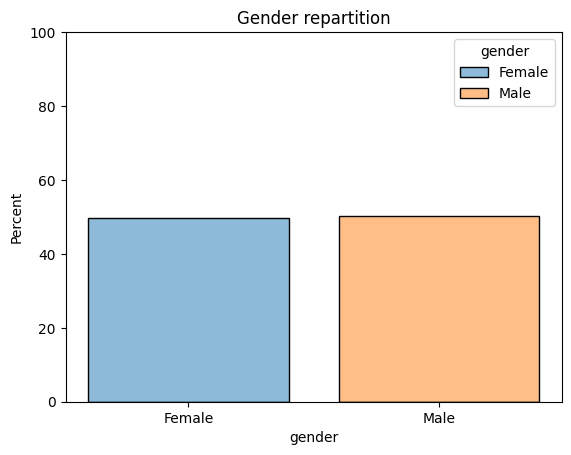

In [26]:
ax = sns.histplot(data = df, x = 'gender', stat= "percent", shrink = 0.8, hue='gender')
ax.set_ylim(0,100)
ax.set_title("Gender repartition");

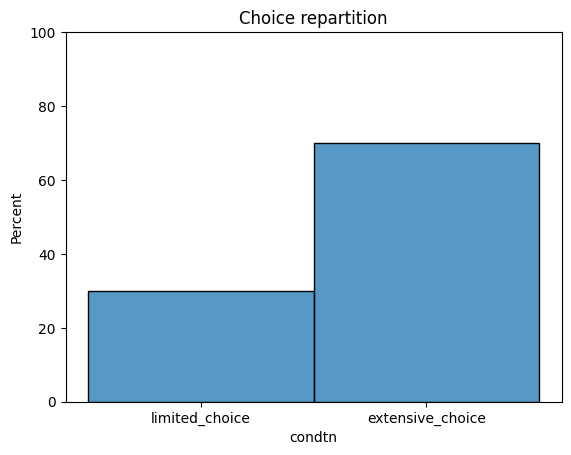

In [27]:
ax1 = sns.histplot(data = df, x = "condtn", stat = 'percent')
ax1.set_ylim(0,100)
ax1.set_title("Choice repartition");

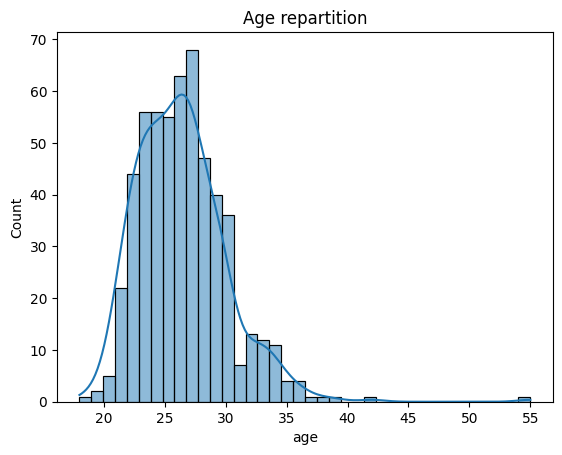

In [28]:
ax2=sns.histplot(data = df, x = "age", kde=True)
ax2.set_title("Age repartition");

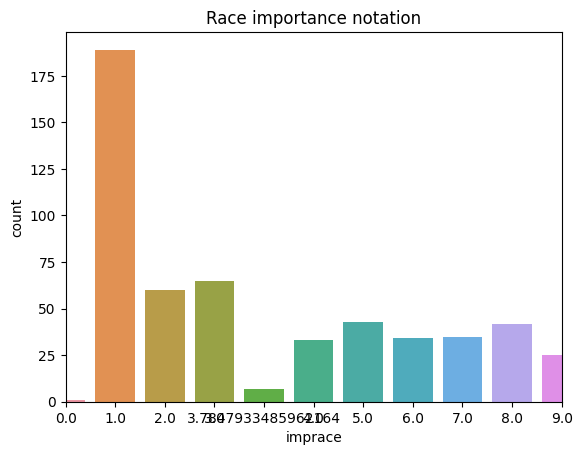

In [29]:
ax3 = sns.countplot(data = df, x = "imprace")
ax3.set_title("Race importance notation")
ax3.set_xlim(0,10);

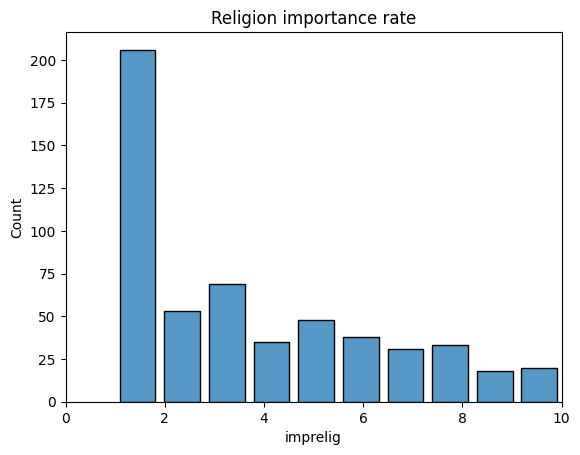

In [30]:
ax4 = sns.histplot(data = df, x= "imprelig", shrink = 0.8, bins=10 )
ax4.set_xlim(0,10)
ax4.set_title("Religion importance rate");

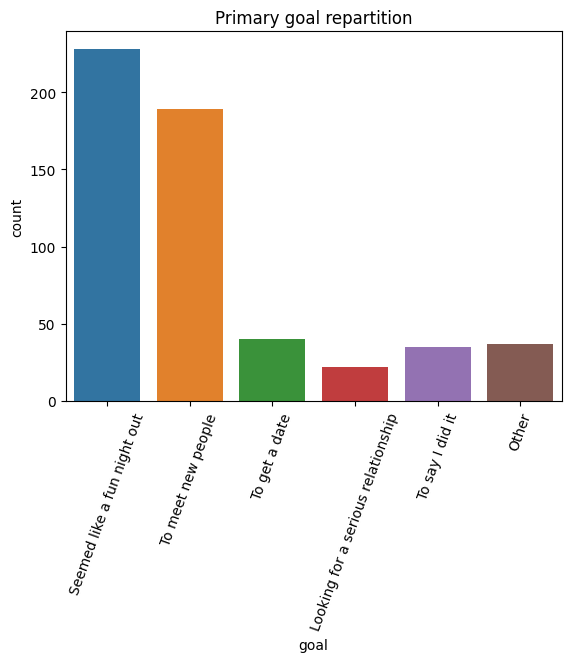

In [31]:
ax5 = sns.countplot(data = df, x = 'goal', order= ["Seemed like a fun night out",
                                                    "To meet new people", 
                                                    "To get a date",
                                                    "Looking for a serious relationship",
                                                    "To say I did it",
                                                    "Other"] )                           
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=70)
ax5.set_title("Primary goal repartition");

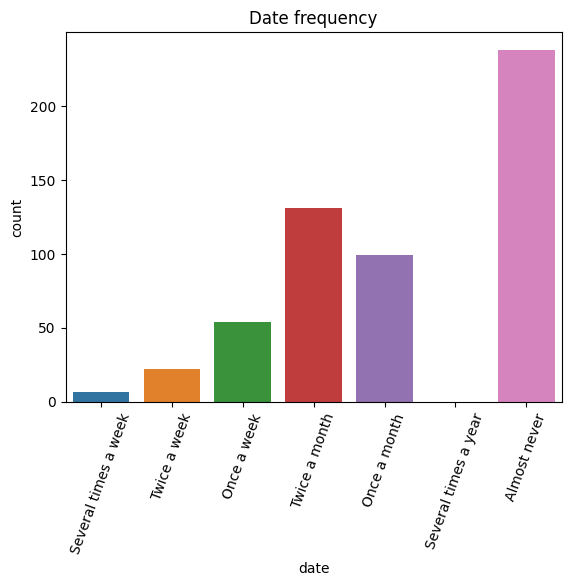

In [32]:
ax6 = sns.countplot(data = df, x = "date", order= ["Several times a week", 
                                                    "Twice a week",
                                                    "Once a week",
                                                    "Twice a month", 
                                                    "Once a month", 
                                                    "Several times a year", 
                                                    "Almost never"])                               
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=70);
ax6.set_title("Date frequency");

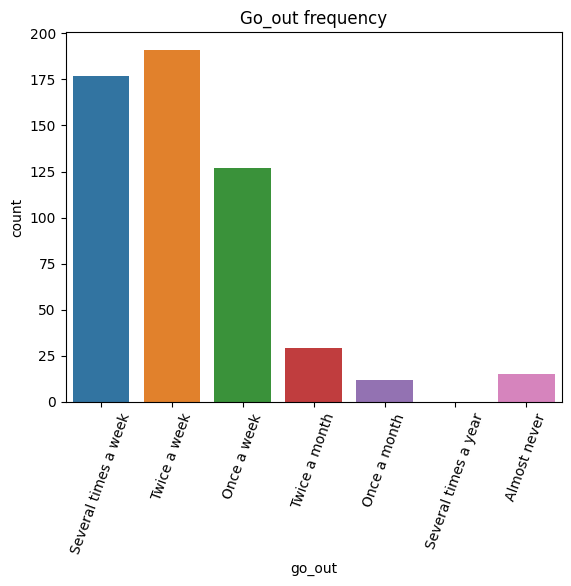

In [33]:
ax7 = sns.countplot(data = df, x = "go_out", order= ["Several times a week", 
                                                    "Twice a week",
                                                    "Once a week",
                                                    "Twice a month", 
                                                    "Once a month", 
                                                    "Several times a year", 
                                                    "Almost never"])                               
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=70);
ax7.set_title("Go_out frequency");

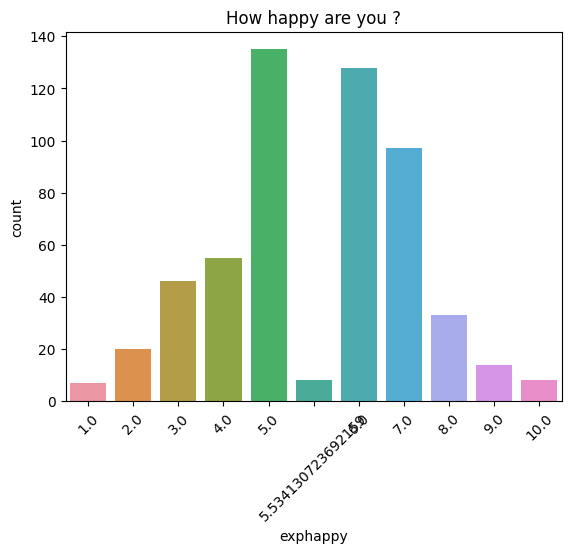

In [34]:
ax8 = sns.countplot(data = df, x = 'exphappy')
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=45);
ax8.set_title("How happy are you ?");

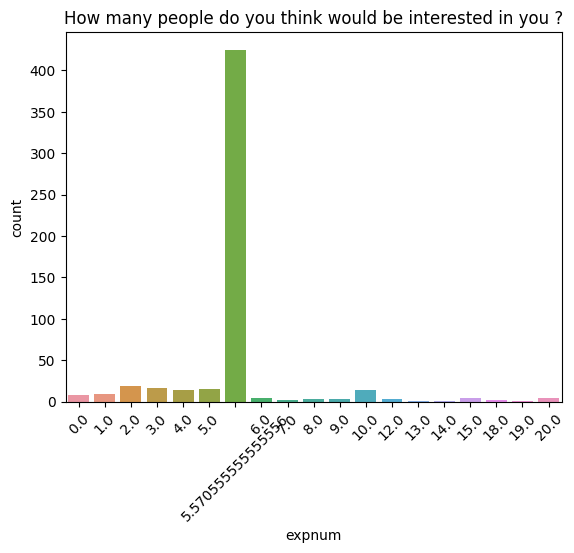

In [35]:
ax9 = sns.countplot(data = df, x = 'expnum')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45)
ax9.set_title("How many people do you think would be interested in you ?");

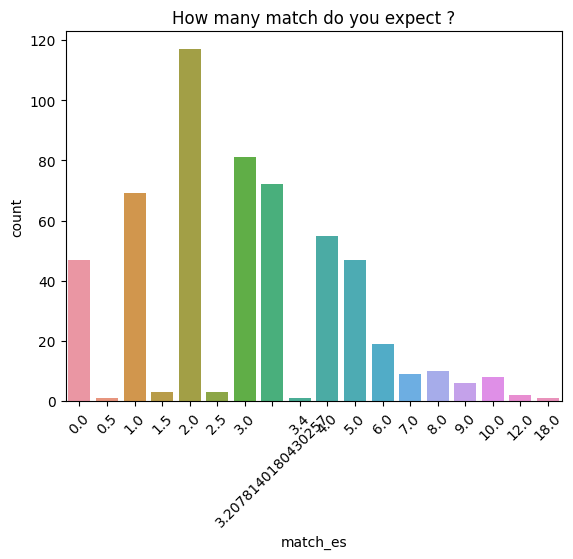

In [36]:
ax10 = sns.countplot(data = df, x = 'match_es')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=45)
ax10.set_title("How many match do you expect ?");

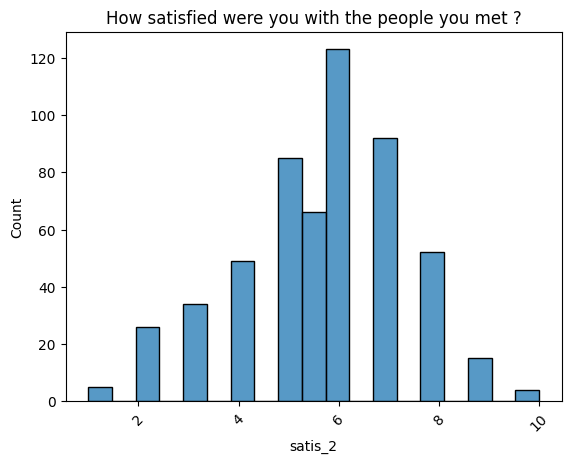

In [37]:
ax11 = sns.histplot(data = df, x = 'satis_2')                                                              # NOTE_ REVOIR LES DONNES NORMALEMENT NOTATION
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=45)
ax11.set_title("How satisfied were you with the people you met ?");

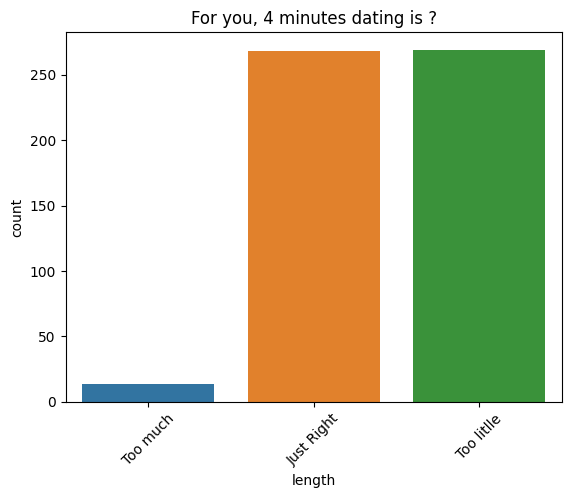

In [38]:
ax12 = sns.countplot(data = df, x = 'length')
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=45)
ax12.set_title("For you, 4 minutes dating is ?");

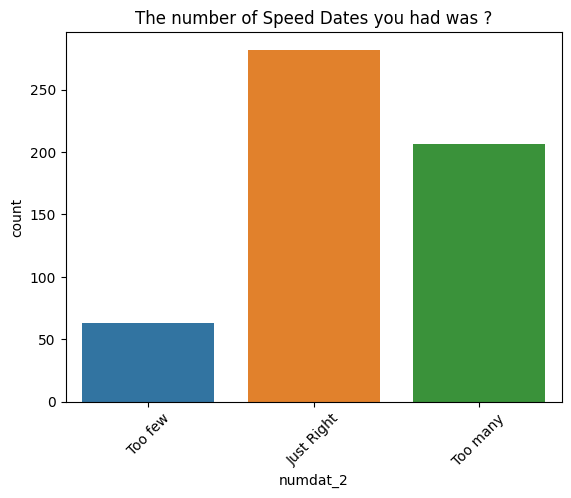

In [39]:
ax13 = sns.countplot(data = df, x = 'numdat_2')
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=45)
ax13.set_title("The number of Speed Dates you had was ?");

In [40]:
help(px.scatter_geo)

Help on function scatter_geo in module plotly.express._chart_types:

scatter_geo(data_frame=None, lat=None, lon=None, locations=None, locationmode=None, geojson=None, featureidkey=None, color=None, text=None, symbol=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, projection=None, scope=None, center=None, fitbounds=None, basemap_visible=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a geographic scatter plot, each row of `data_frame` is represented
        by a symbol mark on a map.
        
    Parameters
    ----------
    data_frame: 

In [41]:
pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
nbformat --version


NameError: name 'nbformat' is not defined

In [56]:
dict = df['from'].value_counts().to_dict()

In [71]:
dict

{'New York': 36,
 'New Jersey': 24,
 'California': 21,
 'China': 8,
 'Boston': 8,
 'New York City': 8,
 'Italy': 7,
 'Taiwan': 7,
 'Texas': 7,
 522: 7,
 'India': 7,
 'Maryland': 7,
 'NYC': 7,
 'Israel': 6,
 'Chicago': 6,
 'Florida': 5,
 'Connecticut': 5,
 'Spain': 5,
 'France': 5,
 'Philadelphia': 5,
 'Boston, MA': 5,
 'Los Angeles': 5,
 'NJ': 5,
 'Washington, DC': 5,
 'San Francisco': 5,
 'Miami': 5,
 'Brooklyn, NY': 4,
 'Long Island': 4,
 'Mexico': 4,
 'Minnesota': 4,
 'Hong Kong': 4,
 'Germany': 4,
 'Pennsylvania': 4,
 'Canada': 4,
 'new york': 4,
 'Baltimore': 3,
 'Ohio': 3,
 'Los Angeles, CA': 3,
 'Indiana': 3,
 'Buffalo, NY': 3,
 'Greece': 3,
 'Singapore': 3,
 'New York, NY': 3,
 'Russia': 3,
 'Washington DC': 3,
 'Michigan': 3,
 'Southern California': 3,
 'Cincinnati, Ohio': 3,
 'England': 3,
 'Houston': 2,
 'colorado': 2,
 'Long Island, NY': 2,
 'california': 2,
 'Colombia': 2,
 'PA': 2,
 'Minneapolis': 2,
 'Atlanta, GA': 2,
 'North Carolina': 2,
 'Brooklyn': 2,
 'Argentina': 2

In [89]:
data_country = pd.DataFrame.from_dict(data=dict, orient = "index", columns=["Number_of_people"])

In [90]:
data_country

,Number_of_people
New York,36
New Jersey,24
California,21
China,8
Boston,8
...,...
Cameroon,1
Bulgaria,1
Alabama,1
Russia/Germany,1


In [94]:
data_country.index.to_list()

['New York',
 'New Jersey',
 'California',
 'China',
 'Boston',
 'New York City',
 'Italy',
 'Taiwan',
 'Texas',
 522,
 'India',
 'Maryland',
 'NYC',
 'Israel',
 'Chicago',
 'Florida',
 'Connecticut',
 'Spain',
 'France',
 'Philadelphia',
 'Boston, MA',
 'Los Angeles',
 'NJ',
 'Washington, DC',
 'San Francisco',
 'Miami',
 'Brooklyn, NY',
 'Long Island',
 'Mexico',
 'Minnesota',
 'Hong Kong',
 'Germany',
 'Pennsylvania',
 'Canada',
 'new york',
 'Baltimore',
 'Ohio',
 'Los Angeles, CA',
 'Indiana',
 'Buffalo, NY',
 'Greece',
 'Singapore',
 'New York, NY',
 'Russia',
 'Washington DC',
 'Michigan',
 'Southern California',
 'Cincinnati, Ohio',
 'England',
 'Houston',
 'colorado',
 'Long Island, NY',
 'california',
 'Colombia',
 'PA',
 'Minneapolis',
 'Atlanta, GA',
 'North Carolina',
 'Brooklyn',
 'Argentina',
 'Cambridge, MA',
 'Kansas',
 'Atlanta',
 'new york city',
 'Northern California',
 'London, England',
 'Virginia',
 'Wisconsin',
 'Seattle',
 'Shanghai, China',
 'Chile',
 'New Del

In [97]:
import plotly.express as px
fig = px.scatter_geo(data_country,
                    locations=data_country.index.to_list(),
                    locationmode = 'USA-states',
                    size = data_country["Number_of_people"],
                    hover_name = data_country.index.to_list(),
                    projection="albers usa")
fig.show(renderer="vscode")


# END PART 1
